<a href="https://colab.research.google.com/github/Cynthiaudoye/Premier-League-Clustering-Analysis/blob/main/Graph_Based_and_KMeans_Clustering_Analysis_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Mining and Discovery Assignment (Report Topic 7 - Graph-based Clustering): Graph-Based and K-Means Clustering on Premier League Match Data**

## **Page source to dataset used:** Premier League Match Data (Kaggle) -
https://www.kaggle.com/datasets/evangower/premier-league-match-data


## **Importing standard libraries**

In [32]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
import networkx as nx
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


## **Loading and exploring the scoccer match dataset**

In [33]:
# Defining file path for soccer dataset
soccer_path = "/content/drive/MyDrive/Data Mining & Discovery/Database/archive/soccer21-22.csv"

# Loading the soccer dataset
soccer = pd.read_csv(soccer_path)

# Exploring the soccer dataset
print(soccer.shape)
print("Soccer Match Data - First 10 Rows:")
soccer.head(10)

(380, 22)
Soccer Match Data - First 10 Rows:


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,...,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,...,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,...,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,Everton,Southampton,3,1,H,0,1,A,A Madley,...,6,3,13,15,6,8,2,0,0,0
5,14/08/2021,Leicester,Wolves,1,0,H,1,0,H,C Pawson,...,5,3,6,10,5,4,1,2,0,0
6,14/08/2021,Watford,Aston Villa,3,2,H,2,0,H,M Dean,...,7,2,18,13,2,4,3,1,0,0
7,14/08/2021,Norwich,Liverpool,0,3,A,0,1,A,A Marriner,...,3,8,4,14,3,11,1,1,0,0
8,15/08/2021,Newcastle,West Ham,2,4,A,2,1,H,M Atkinson,...,3,9,4,3,7,6,1,0,0,0
9,15/08/2021,Tottenham,Man City,1,0,H,0,0,D,A Taylor,...,3,4,11,8,3,11,2,1,0,0


In [34]:
# Soccer match data summary
print("Soccer Match Data - Summary:")
soccer.info()

Soccer Match Data - Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      380 non-null    object
 1   HomeTeam  380 non-null    object
 2   AwayTeam  380 non-null    object
 3   FTHG      380 non-null    int64 
 4   FTAG      380 non-null    int64 
 5   FTR       380 non-null    object
 6   HTHG      380 non-null    int64 
 7   HTAG      380 non-null    int64 
 8   HTR       380 non-null    object
 9   Referee   380 non-null    object
 10  HS        380 non-null    int64 
 11  AS        380 non-null    int64 
 12  HST       380 non-null    int64 
 13  AST       380 non-null    int64 
 14  HF        380 non-null    int64 
 15  AF        380 non-null    int64 
 16  HC        380 non-null    int64 
 17  AC        380 non-null    int64 
 18  HY        380 non-null    int64 
 19  AY        380 non-null    int64 
 20  HR        380 non-null   

In [35]:
# Counting the unique teams in the HomeTeam and AwayTeam columns
soccer[['HomeTeam', 'AwayTeam']].nunique()

,0
HomeTeam,20
AwayTeam,20


In [36]:
# Creating sets of unique teams that played as home and away teams
home_teams = set(soccer['HomeTeam'].unique())
away_teams = set(soccer['AwayTeam'].unique())

# Find teams that appear in both lists
common_teams = home_teams.intersection(away_teams)
print("Teams that played both home and away:", common_teams)

# Check if any team is missing from either list
missing_in_home = away_teams - home_teams
missing_in_away = home_teams - away_teams

print("Teams missing from HomeTeam list:", missing_in_home)
print("Teams missing from AwayTeam list:", missing_in_away)


Teams that played both home and away: {'Newcastle', 'Burnley', 'Tottenham', 'Leeds', 'Brighton', 'Leicester', 'Everton', 'Man City', 'Norwich', 'Wolves', 'Aston Villa', 'West Ham', 'Arsenal', 'Man United', 'Southampton', 'Liverpool', 'Watford', 'Brentford', 'Crystal Palace', 'Chelsea'}
Teams missing from HomeTeam list: set()
Teams missing from AwayTeam list: set()


## **Loading and exploring the weeklyrank dataset**

In [37]:
# Defining file paths for weeklyrank dataset
weeklyrank_path = "/content/drive/MyDrive/Data Mining & Discovery/Database/archive/weeklyrank.csv"

# Loading the weeklyrank dataset
weeklyrank = pd.read_csv(weeklyrank_path)

# Exploring the weeklyrank dataset
print(weeklyrank.shape)
print("Weekly Rank Data - First 10 Rows:")
weeklyrank.head(10)


(760, 5)
Weekly Rank Data - First 10 Rows:


,Team,GD,Points,Rank,Week
0,Man United,4,3,1,1
1,Chelsea,3,3,2,1
2,Liverpool,3,3,3,1
3,West Ham,2,3,4,1
4,Everton,2,3,5,1
5,Brentford,2,3,6,1
6,Watford,1,3,7,1
7,Brighton,1,3,8,1
8,Leicester,1,3,9,1
9,Tottenham,1,3,10,1


In [38]:
# Weekly data summary
print("Weekly Rank Data - Summary:")
weeklyrank.info()

Weekly Rank Data - Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    760 non-null    object
 1   GD      760 non-null    int64 
 2   Points  760 non-null    int64 
 3   Rank    760 non-null    int64 
 4   Week    760 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 29.8+ KB


In [39]:
# Get a list of all unique teams that played as the team
weeklyrank['Team'].unique()

array(['Man United', 'Chelsea', 'Liverpool', 'West Ham', 'Everton',
       'Brentford', 'Watford', 'Brighton', 'Leicester', 'Tottenham',
       'Aston Villa', 'Burnley', 'Man City', 'Wolves', 'Newcastle',
       'Southampton', 'Arsenal', 'Crystal Palace', 'Norwich', 'Leeds'],
      dtype=object)

# **Preprocessing Steps**

### **1. Aggregating Home Team Stats**

In [40]:
# Aggregate home stats
home_agg = soccer.groupby('HomeTeam').agg({
    'FTHG': 'sum',  # Total goals scored at home
    'FTAG': 'sum',  # Total goals conceded at home
    'HF': 'sum',    # Total fouls committed at home
    'HS': 'sum',    # Total shots taken at home
    'HST': 'sum',   # Total shots on target at home
    'HY': 'sum',    # Total yellow cards at home
    'HR': 'sum',    # Total red cards at home
    'HC': 'sum'     # Total corners at home
}).rename(columns={
    'FTHG': 'HomeGoals',
    'FTAG': 'HomeConceded',
    'HF': 'HomeFouls',
    'HS': 'HomeShots',
    'HST': 'HomeShotsOnTarget',
    'HY': 'HomeYellowCards',
    'HR': 'HomeRedCards',
    'HC': 'HomeCorners'
})

# Displaying the aggregated stats
home_agg

,HomeGoals,HomeConceded,HomeFouls,HomeShots,HomeShotsOnTarget,HomeYellowCards,HomeRedCards,HomeCorners
HomeTeam,,,,,,,,
Arsenal,35,17,179,347,116,31,1,127
Aston Villa,29,29,190,235,86,31,2,90
Brentford,22,21,187,233,77,29,2,88
Brighton,19,23,208,280,67,32,1,118
Burnley,18,25,201,229,73,34,0,102
Chelsea,37,22,213,326,115,32,0,138
Crystal Palace,27,17,210,231,81,34,0,91
Everton,27,25,167,227,76,41,5,93
Leeds,19,38,236,264,75,53,2,96


### **2. Aggregating Away Team Stats**

In [41]:
# Aggregate away stats
away_agg = soccer.groupby('AwayTeam').agg({
    'FTAG': 'sum',  # Total goals scored away
    'FTHG': 'sum',  # Total goals conceded away
    'AF': 'sum',    # Total fouls committed away
    'AS': 'sum',    # Total shots taken away
    'AST': 'sum',   # Total shots on target away
    'AY': 'sum',    # Total yellow cards away
    'AR': 'sum',    # Total red cards away
    'AC': 'sum'     # Total corners away
}).rename(columns={
    'FTAG': 'AwayGoals',
    'FTHG': 'AwayConceded',
    'AF': 'AwayFouls',
    'AS': 'AwayShots',
    'AST': 'AwayShotsOnTarget',
    'AY': 'AwayYellowCards',
    'AR': 'AwayRedCards',
    'AC': 'AwayCorners'
})

# Displaying the aggregated stats
away_agg

,AwayGoals,AwayConceded,AwayFouls,AwayShots,AwayShotsOnTarget,AwayYellowCards,AwayRedCards,AwayCorners
AwayTeam,,,,,,,,
Arsenal,26,31,184,241,81,29,3,82
Aston Villa,23,25,211,219,76,46,0,106
Brentford,26,35,184,209,77,32,1,71
Brighton,23,21,185,210,85,39,1,84
Burnley,16,28,193,178,52,34,2,82
Chelsea,39,11,196,266,96,31,1,104
Crystal Palace,23,29,205,181,66,33,1,85
Everton,16,41,201,211,62,35,1,68
Leeds,23,41,233,221,79,47,1,75


### **3. Merging Dataframes**

In [42]:
## first we merge the home and away aggregated stats to form 1 team_agg DataFrames

# Combining home_agg and away_agg DataFrames by merging them on their indices
team_agg = home_agg.merge(away_agg, left_index=True, right_index=True)
team_agg

,HomeGoals,HomeConceded,HomeFouls,HomeShots,HomeShotsOnTarget,HomeYellowCards,HomeRedCards,HomeCorners,AwayGoals,AwayConceded,AwayFouls,AwayShots,AwayShotsOnTarget,AwayYellowCards,AwayRedCards,AwayCorners
HomeTeam,,,,,,,,,,,,,,,,
Arsenal,35,17,179,347,116,31,1,127,26,31,184,241,81,29,3,82
Aston Villa,29,29,190,235,86,31,2,90,23,25,211,219,76,46,0,106
Brentford,22,21,187,233,77,29,2,88,26,35,184,209,77,32,1,71
Brighton,19,23,208,280,67,32,1,118,23,21,185,210,85,39,1,84
Burnley,18,25,201,229,73,34,0,102,16,28,193,178,52,34,2,82
Chelsea,37,22,213,326,115,32,0,138,39,11,196,266,96,31,1,104
Crystal Palace,27,17,210,231,81,34,0,91,23,29,205,181,66,33,1,85
Everton,27,25,167,227,76,41,5,93,16,41,201,211,62,35,1,68
Leeds,19,38,236,264,75,53,2,96,23,41,233,221,79,47,1,75


In [43]:
# Calculate total stats
team_agg['TotalGoals'] = team_agg['HomeGoals'] + team_agg['AwayGoals']
team_agg['TotalConceded'] = team_agg['HomeConceded'] + team_agg['AwayConceded']
team_agg['GoalDifference'] = team_agg['TotalGoals'] - team_agg['TotalConceded']
team_agg['TotalFouls'] = team_agg['HomeFouls'] + team_agg['AwayFouls']
team_agg['TotalShots'] = team_agg['HomeShots'] + team_agg['AwayShots']
team_agg['TotalShotsOnTarget'] = team_agg['HomeShotsOnTarget'] + team_agg['AwayShotsOnTarget']
team_agg['TotalCorners'] = team_agg['HomeCorners'] + team_agg['AwayCorners']
team_agg['TotalYellowCards'] = team_agg['HomeYellowCards'] + team_agg['AwayYellowCards']
team_agg['TotalRedCards'] = team_agg['HomeRedCards'] + team_agg['AwayRedCards']

# Reset index for merging and rename 'HomeTeam' to 'Team' in team_agg
team_agg = team_agg.reset_index().rename(columns={'HomeTeam': 'Team'})
team_agg

,Team,HomeGoals,HomeConceded,HomeFouls,HomeShots,HomeShotsOnTarget,HomeYellowCards,HomeRedCards,HomeCorners,AwayGoals,...,AwayCorners,TotalGoals,TotalConceded,GoalDifference,TotalFouls,TotalShots,TotalShotsOnTarget,TotalCorners,TotalYellowCards,TotalRedCards
0,Arsenal,35,17,179,347,116,31,1,127,26,...,82,61,48,13,363,588,197,209,60,4
1,Aston Villa,29,29,190,235,86,31,2,90,23,...,106,52,54,-2,401,454,162,196,77,2
2,Brentford,22,21,187,233,77,29,2,88,26,...,71,48,56,-8,371,442,154,159,61,3
3,Brighton,19,23,208,280,67,32,1,118,23,...,84,42,44,-2,393,490,152,202,71,2
4,Burnley,18,25,201,229,73,34,0,102,16,...,82,34,53,-19,394,407,125,184,68,2
5,Chelsea,37,22,213,326,115,32,0,138,39,...,104,76,33,43,409,592,211,242,63,1
6,Crystal Palace,27,17,210,231,81,34,0,91,23,...,85,50,46,4,415,412,147,176,67,1
7,Everton,27,25,167,227,76,41,5,93,16,...,68,43,66,-23,368,438,138,161,76,6
8,Leeds,19,38,236,264,75,53,2,96,23,...,75,42,79,-37,469,485,154,171,100,3
9,Leicester,34,23,168,237,94,22,0,93,28,...,92,62,59,3,356,435,169,185,54,1


In [44]:
# Displaying the list of columns in my weeklyrank dataframe and my team_agg DataFrames
print(weeklyrank.columns)
print(team_agg.columns)


Index(['Team', 'GD', 'Points', 'Rank', 'Week'], dtype='object')
Index(['Team', 'HomeGoals', 'HomeConceded', 'HomeFouls', 'HomeShots',
       'HomeShotsOnTarget', 'HomeYellowCards', 'HomeRedCards', 'HomeCorners',
       'AwayGoals', 'AwayConceded', 'AwayFouls', 'AwayShots',
       'AwayShotsOnTarget', 'AwayYellowCards', 'AwayRedCards', 'AwayCorners',
       'TotalGoals', 'TotalConceded', 'GoalDifference', 'TotalFouls',
       'TotalShots', 'TotalShotsOnTarget', 'TotalCorners', 'TotalYellowCards',
       'TotalRedCards'],
      dtype='object')


In [45]:
## lastly we merge weeklyrank and team_agg DataFrames to get our final dataset
final_data = weeklyrank.merge(team_agg, on='Team', how='left')

# Inspect combined data
print(f"Final dataset shape: {final_data.shape}")
final_data


Final dataset shape: (760, 30)


,Team,GD,Points,Rank,Week,HomeGoals,HomeConceded,HomeFouls,HomeShots,HomeShotsOnTarget,...,AwayCorners,TotalGoals,TotalConceded,GoalDifference,TotalFouls,TotalShots,TotalShotsOnTarget,TotalCorners,TotalYellowCards,TotalRedCards
0,Man United,4,3,1,1,32,22,169,279,100,...,104,57,57,0,395,508,187,199,75,2
1,Chelsea,3,3,2,1,37,22,213,326,115,...,104,76,33,43,409,592,211,242,63,1
2,Liverpool,3,3,3,1,49,9,172,404,136,...,133,94,26,68,363,730,256,285,50,1
3,West Ham,2,3,4,1,33,26,162,232,85,...,85,60,51,9,324,433,158,191,47,3
4,Everton,2,3,5,1,27,25,167,227,76,...,68,43,66,-23,368,438,138,161,76,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Everton,-23,39,16,38,27,25,167,227,76,...,68,43,66,-23,368,438,138,161,76,6
756,Leeds,-37,38,17,38,19,38,236,264,75,...,75,42,79,-37,469,485,154,171,100,3
757,Burnley,-19,35,18,38,18,25,201,229,73,...,82,34,53,-19,394,407,125,184,68,2
758,Watford,-43,23,19,38,17,46,215,216,69,...,78,34,77,-43,440,396,127,162,57,3


In [46]:
# Displaying the info in my final DataFrame
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Team                760 non-null    object
 1   GD                  760 non-null    int64 
 2   Points              760 non-null    int64 
 3   Rank                760 non-null    int64 
 4   Week                760 non-null    int64 
 5   HomeGoals           760 non-null    int64 
 6   HomeConceded        760 non-null    int64 
 7   HomeFouls           760 non-null    int64 
 8   HomeShots           760 non-null    int64 
 9   HomeShotsOnTarget   760 non-null    int64 
 10  HomeYellowCards     760 non-null    int64 
 11  HomeRedCards        760 non-null    int64 
 12  HomeCorners         760 non-null    int64 
 13  AwayGoals           760 non-null    int64 
 14  AwayConceded        760 non-null    int64 
 15  AwayFouls           760 non-null    int64 
 16  AwayShots           760 no

In [47]:
# Displaying the summary statistic in my final DataFrame
final_data.describe()

,GD,Points,Rank,Week,HomeGoals,HomeConceded,HomeFouls,HomeShots,HomeShotsOnTarget,HomeYellowCards,...,AwayCorners,TotalGoals,TotalConceded,GoalDifference,TotalFouls,TotalShots,TotalShotsOnTarget,TotalCorners,TotalYellowCards,TotalRedCards
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.0000,760.000000,760.000000,760.000000,760.000000,...,760.000000,760.000000,760.000000,760.00000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,0.000000,26.819737,10.500000,19.500000,28.750000,24.8000,191.050000,263.100000,88.900000,31.400000,...,91.600000,53.550000,53.550000,0.00000,384.050000,486.100000,167.600000,198.050000,64.550000,2.150000
std,19.540101,19.080521,5.770079,10.973078,10.979349,8.7155,21.086312,53.221396,20.805277,7.134913,...,20.921662,18.974225,15.823304,32.99443,34.553125,96.420552,38.530422,41.475426,12.820443,1.236735
min,-61.000000,0.000000,1.000000,1.000000,12.000000,9.0000,159.000000,203.000000,63.000000,16.000000,...,65.000000,23.000000,26.000000,-61.00000,320.000000,374.000000,109.000000,159.000000,42.000000,1.000000
25%,-8.000000,12.000000,5.750000,10.000000,19.750000,20.5000,171.250000,230.500000,74.500000,29.000000,...,79.500000,42.000000,43.750000,-20.00000,363.000000,427.750000,144.750000,167.250000,56.500000,1.000000
50%,-2.000000,22.500000,10.500000,19.500000,27.000000,23.5000,188.500000,236.500000,83.000000,31.000000,...,84.500000,49.000000,53.500000,-2.00000,388.500000,451.000000,156.000000,188.000000,63.000000,2.000000
75%,5.000000,39.000000,15.250000,29.000000,34.250000,26.2500,208.250000,279.250000,97.750000,34.000000,...,104.000000,61.250000,63.000000,10.00000,401.250000,495.250000,189.500000,203.750000,72.000000,3.000000
max,73.000000,93.000000,20.000000,38.000000,58.000000,46.0000,236.000000,404.000000,136.000000,53.000000,...,147.000000,99.000000,84.000000,73.00000,469.000000,730.000000,256.000000,317.000000,100.000000,6.000000


In [48]:
# Compare top-performing and low-performing teams by rank
top_teams = final_data[final_data['Rank'] <= 5]
low_teams = final_data[final_data['Rank'] >= 15]

# Display the top and low teams' averages for key metrics
top_avg = top_teams[['Points', 'GoalDifference', 'TotalGoals', 'TotalConceded']].mean()
low_avg = low_teams[['Points', 'GoalDifference', 'TotalGoals', 'TotalConceded']].mean()
print("Top Teams Average Metrics:\n", top_avg)
print("\nLow Teams Average Metrics:\n", low_avg)

Top Teams Average Metrics:
 Points            41.094737
GoalDifference    39.642105
TotalGoals        76.968421
TotalConceded     37.326316
dtype: float64

Low Teams Average Metrics:
 Points            15.741228
GoalDifference   -31.311404
TotalGoals        37.539474
TotalConceded     68.850877
dtype: float64


In [49]:
# Home vs Away Performance Comparison
home_performance = final_data[['HomeGoals', 'HomeConceded']].mean()
away_performance = final_data[['AwayGoals', 'AwayConceded']].mean()
print("\nAverage Home Performance:\n", home_performance)
print("\nAverage Away Performance:\n", away_performance)


Average Home Performance:
 HomeGoals       28.75
HomeConceded    24.80
dtype: float64

Average Away Performance:
 AwayGoals       24.80
AwayConceded    28.75
dtype: float64


In [50]:
# Getting unique teams with their maximum points and total goals scored
unique_top_5_teams = final_data.groupby('Team').agg({'Points': 'max', 'TotalGoals': 'max'}).sort_values(by='Points', ascending=False).head(5)
unique_low_5_teams = final_data.groupby('Team').agg({'Points': 'min', 'TotalGoals': 'min'}).sort_values(by='Points', ascending=True).head(5)

# Displaying the top and bottom 5 unique teams based on Points and Total Goals
print("Top 5 Performing Teams (Unique):")
print(unique_top_5_teams)

print("\nBottom 5 Performing Teams (Unique):")
print(unique_low_5_teams)


Top 5 Performing Teams (Unique):
           Points  TotalGoals
Team                         
Man City       93          99
Liverpool      92          94
Chelsea        74          76
Tottenham      71          69
Arsenal        69          61

Bottom 5 Performing Teams (Unique):
             Points  TotalGoals
Team                           
Arsenal           0          61
Southampton       0          43
Norwich           0          23
Newcastle         0          44
Man City          0          99


## **Analysis of the Goal Difference - columns in the final dataframe**

1.   GD (Goal Difference from weeklyrank):

This value is provided directly in the weeklyrank dataset.
It might represent a cumulative or periodic calculation (weekly updates).

2.   GoalDifference (Calculated in team_agg):

This value is derived from the formula:

GoalDifference = TotalGoals−TotalConceded

Represents the seasonal total for each team based on aggregated match data.

In [51]:
# Checking if GD and GoalDifference are duplicates
are_duplicates = (final_data['GD'] == final_data['GoalDifference']).all()

print(f"Are 'GD' and 'GoalDifference' identical? {are_duplicates}")


Are 'GD' and 'GoalDifference' identical? False


In [52]:
# Identifing rows where the computed 'GD' (Goal Difference) differs from the 'GoalDifference' column
differences = final_data[final_data['GD'] != final_data['GoalDifference']]

# Displaying the team names and the mismatched goal difference values for debugging
differences[['Team', 'GD', 'GoalDifference']]


,Team,GD,GoalDifference
0,Man United,4,0
1,Chelsea,3,43
2,Liverpool,3,68
3,West Ham,2,9
4,Everton,2,-23
...,...,...,...
735,Everton,-19,-23
736,Burnley,-18,-19
737,Leeds,-38,-37
738,Watford,-42,-43


### **4. Selecting Features For Clustering**

In [53]:
# Selecting the features
features = [
    'Points', 'Rank', 'GoalDifference', 'TotalGoals', 'TotalConceded',
    'TotalFouls', 'TotalYellowCards', 'TotalRedCards',
    'TotalShots', 'TotalShotsOnTarget', 'TotalCorners'
]

# Subsetting the dataset
clustering_data = final_data[features]

# Inspecting selected features
clustering_data.head()


,Points,Rank,GoalDifference,TotalGoals,TotalConceded,TotalFouls,TotalYellowCards,TotalRedCards,TotalShots,TotalShotsOnTarget,TotalCorners
0,3,1,0,57,57,395,75,2,508,187,199
1,3,2,43,76,33,409,63,1,592,211,242
2,3,3,68,94,26,363,50,1,730,256,285
3,3,4,9,60,51,324,47,3,433,158,191
4,3,5,-23,43,66,368,76,6,438,138,161


### **5. Scaling Selected Features For Clustering**

In [54]:
# Scaling the features
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Inspecting scaled data
clustering_data_scaled[:5]


array([[-1.24920191, -1.64750894,  0.        ,  0.18194535,  0.21817643,
         0.31711201,  0.8156412 , -0.12136701,  0.22727958,  0.50382983,
         0.02292021],
       [-1.24920191, -1.47408695,  1.30410852,  1.18396321, -1.29957266,
         0.72255203, -0.12098027, -0.9304804 ,  1.09903685,  1.12712446,
         1.06036146],
       [-1.24920191, -1.30066495,  2.06231115,  2.13324329, -1.74224948,
        -0.60960803, -1.13565353, -0.9304804 ,  2.53120953,  2.29580189,
         2.09780271],
       [-1.24920191, -1.12724296,  0.27295295,  0.3401587 , -0.16126084,
        -1.73904808, -1.3698089 ,  0.68774638, -0.55107514, -0.24931785,
        -0.17009211],
       [-1.24920191, -0.95382097, -0.69754642, -0.5563836 ,  0.78733234,
        -0.46480802,  0.89369299,  3.11508657, -0.49918482, -0.76873004,
        -0.89388833]])

# **Clustering**

## **1. Applying Spectral Clustering for Graph-based Clustering**

### **Determining the Optimal Number of Spectral Clusters (Silhouette Method)**

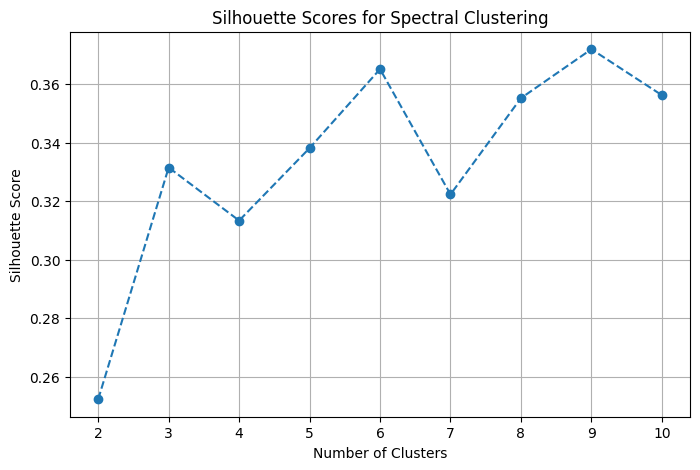

Optimal number of clusters for Spectral Clustering: 9


In [55]:
# Start from k=2 to avoid trivial single-cluster results
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    spectral = SpectralClustering(n_clusters=k, affinity='rbf', random_state=42)
    cluster_labels = spectral.fit_predict(clustering_data_scaled)
    score = silhouette_score(clustering_data_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Spectral Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

# Optimal k based on the highest silhouette score
sp_optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters for Spectral Clustering: {sp_optimal_k}")


In [56]:
# Setting the optimal number of clusters (based on elbow method)
sp_optimal_k = 9

# Applying Spectral Clustering
spectral = SpectralClustering(n_clusters = sp_optimal_k, affinity='rbf', random_state=42)
final_data['SpectralCluster'] = spectral.fit_predict(clustering_data_scaled)

# Inspectting Spectral cluster assignments
print(final_data[['Team', 'SpectralCluster']].head())


         Team  SpectralCluster
0  Man United                0
1     Chelsea                2
2   Liverpool                1
3    West Ham                3
4     Everton                5


### *   **Evaluating Spectral Clustering Quality**

In [57]:
# Calculate Silhouette Score for Spectral Clustering
spectral_silhouette = silhouette_score(clustering_data_scaled, final_data['SpectralCluster'])

# Printing the Silhouette Score for Spectral Clustering
print(f"Spectral Clustering Silhouette Score: {spectral_silhouette:.3f}")


Spectral Clustering Silhouette Score: 0.372


In [58]:
# Construct the graph
connectivity_graph = kneighbors_graph(clustering_data_scaled, n_neighbors=10, include_self=False)
graph = nx.from_scipy_sparse_array(connectivity_graph)

# Check if the graph is fully connected
print(f"Is the graph fully connected? {nx.is_connected(graph)}")

# If the graph is not fully connected, print the number of connected components
if not nx.is_connected(graph):
    print(f"Number of connected components: {nx.number_connected_components(graph)}")


Is the graph fully connected? False
Number of connected components: 18


### *   **Using PCA for Visualization on the Spectral Clusters**

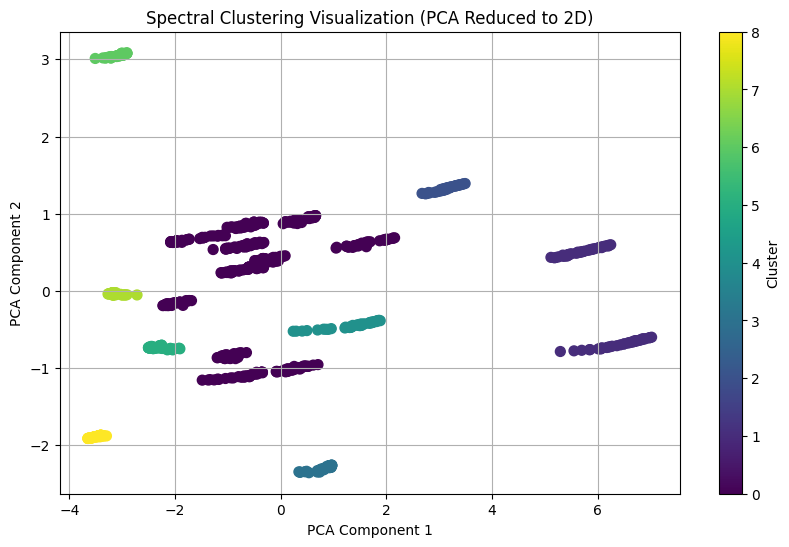

In [59]:
# Applying PCA to reduce data to 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(clustering_data_scaled)

# Adding PCA components to the dataframe for visualization
final_data['PCA1'] = pca_data[:, 0]
final_data['PCA2'] = pca_data[:, 1]

# Plotting Spectral Clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    final_data['PCA1'],
    final_data['PCA2'],
    c=final_data['SpectralCluster'],
    cmap='viridis',
    s=50
)
plt.title("Spectral Clustering Visualization (PCA Reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Cluster")
plt.grid()
plt.show()




### *   **Grouping by Team for the Spectral clustering**



In [60]:
# Group by 'Team' and include the cluster assignments
team_spcluster_summary = final_data.groupby('Team')[['SpectralCluster']].first()

# Merge with team stats for richer analysis
team_spcluster_stats = final_data[['Team', 'Points', 'Rank', 'GoalDifference', 'SpectralCluster']]

# Sort by cluster for better visualization
team_spcluster_stats = team_spcluster_stats.sort_values(by='SpectralCluster')

# Inspect the output
print("Team Clustering Summary for Spectral:")
team_spcluster_stats


Team Clustering Summary for Spectral:


,Team,Points,Rank,GoalDifference,SpectralCluster
0,Man United,3,1,0,0
328,Aston Villa,22,9,-2,0
327,Wolves,25,8,-5,0
326,Tottenham,26,7,29,0
325,Man United,27,6,0,0
...,...,...,...,...,...
437,Norwich,17,18,-61,8
416,Norwich,16,17,-61,8
397,Norwich,13,18,-61,8
719,Norwich,21,20,-61,8




### *   **Visualizing Team K-means Clusters**



Number of Teams per Spectral Cluster:
SpectralCluster
0    418
1     76
2     38
3     38
4     38
5     38
6     38
7     38
8     38
Name: count, dtype: int64


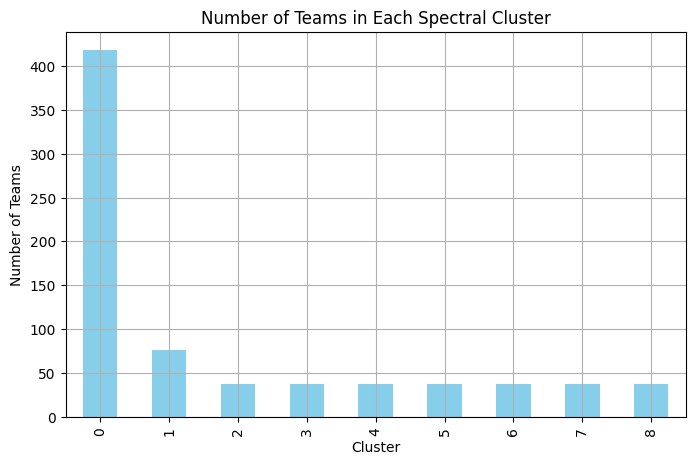

In [61]:
# Count teams in each Spectral cluster
team_count_by_spcluster = team_spcluster_stats['SpectralCluster'].value_counts()

# Display the count of teams per Spectral cluster
print("Number of Teams per Spectral Cluster:")
print(team_count_by_spcluster)

# Visualize cluster distribution
plt.figure(figsize=(8, 5))
team_count_by_spcluster.sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Teams in Each Spectral Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Teams')
plt.grid()
plt.show()


### *   **Summarizing Teams in Each Spectral Cluster**

In [62]:
# Loop through each Spectral cluster and display unique teams along with their count
spclusters = final_data['SpectralCluster'].unique()

print("Unique Teams in Each Spectral Cluster:")
for spcluster in sorted(spclusters):
    # Get unique teams in the current Spectral cluster
    teams_in_spcluster = final_data[final_data['SpectralCluster'] == spcluster]['Team'].unique()
    # Print the Spectral cluster and the unique teams
    print(f"\nSpectral Cluster {spcluster} (Total Teams: {len(teams_in_spcluster)}):")
    print(", ".join(teams_in_spcluster))


Unique Teams in Each Spectral Cluster:

Spectral Cluster 0 (Total Teams: 11):
Man United, Brentford, Brighton, Leicester, Tottenham, Aston Villa, Burnley, Wolves, Newcastle, Southampton, Crystal Palace

Spectral Cluster 1 (Total Teams: 2):
Liverpool, Man City

Spectral Cluster 2 (Total Teams: 1):
Chelsea

Spectral Cluster 3 (Total Teams: 1):
West Ham

Spectral Cluster 4 (Total Teams: 1):
Arsenal

Spectral Cluster 5 (Total Teams: 1):
Everton

Spectral Cluster 6 (Total Teams: 1):
Leeds

Spectral Cluster 7 (Total Teams: 1):
Watford

Spectral Cluster 8 (Total Teams: 1):
Norwich




### *   **Calculating Spectral Cluster Averages**



In [63]:
# Drop non-numeric columns explicitly 'Team'
spclustered_data = final_data.drop(columns=['Team'])

# Group data by Spectral Cluster and calculate average for key features
spectral_cluster_summary = spclustered_data.groupby('SpectralCluster').mean()[[
    'Points', 'Rank', 'GoalDifference', 'TotalGoals', 'TotalConceded',
    'TotalFouls', 'TotalYellowCards', 'TotalRedCards',
    'TotalShots', 'TotalShotsOnTarget', 'TotalCorners'
]]

# Display the Spectral cluster summary
print("Spectral Cluster Summary:")
spectral_cluster_summary


Spectral Cluster Summary:


,Points,Rank,GoalDifference,TotalGoals,TotalConceded,TotalFouls,TotalYellowCards,TotalRedCards,TotalShots,TotalShotsOnTarget,TotalCorners
SpectralCluster,,,,,,,,,,,
0,24.586124,11.330144,-3.818182,49.0,52.818182,388.090909,67.363636,1.727273,451.909091,158.909091,187.090909
1,46.776316,2.263158,70.500000,96.5,26.000000,341.500000,46.000000,1.000000,722.500000,255.000000,301.000000
2,40.710526,2.447368,43.000000,76.0,33.000000,409.000000,63.000000,1.000000,592.000000,211.000000,242.000000
3,32.894737,5.394737,9.000000,60.0,51.000000,324.000000,47.000000,3.000000,433.000000,158.000000,191.000000
4,33.921053,7.236842,13.000000,61.0,48.000000,363.000000,60.000000,4.000000,588.000000,197.000000,209.000000
5,20.052632,13.131579,-23.000000,43.0,66.000000,368.000000,76.000000,6.000000,438.000000,138.000000,161.000000
6,18.657895,16.289474,-37.000000,42.0,79.000000,469.000000,100.000000,3.000000,485.000000,154.000000,171.000000
7,14.473684,16.736842,-43.000000,34.0,77.000000,440.000000,57.000000,3.000000,396.000000,127.000000,162.000000
8,11.684211,19.605263,-61.000000,23.0,84.000000,356.000000,55.000000,2.000000,374.000000,109.000000,165.000000


### *   **Visualizing Key Metrics for Spectral Cluster**

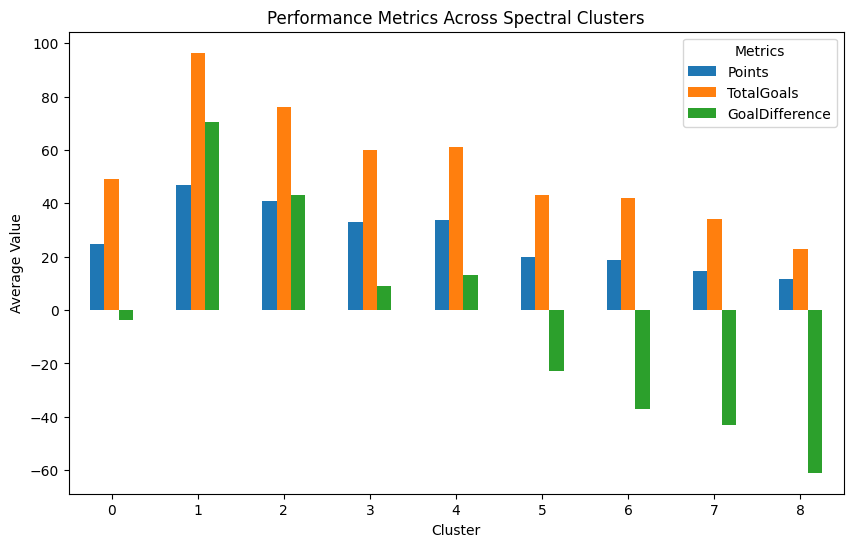

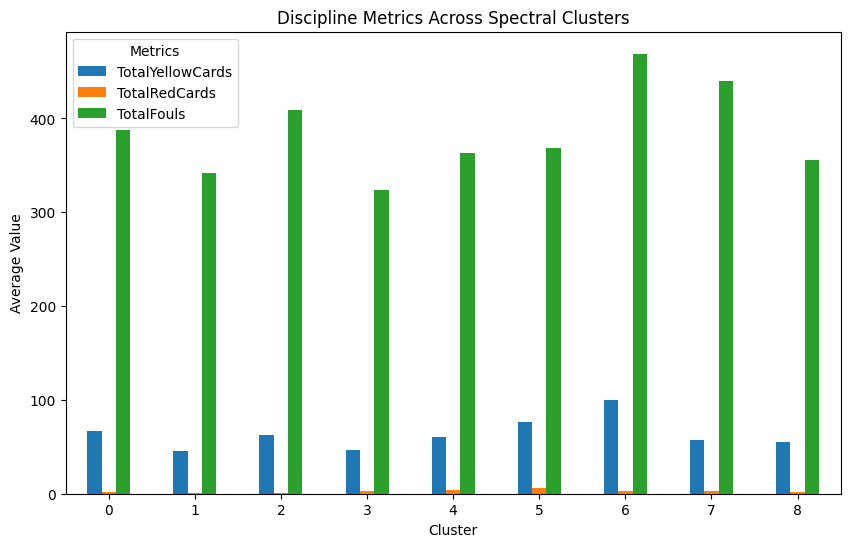

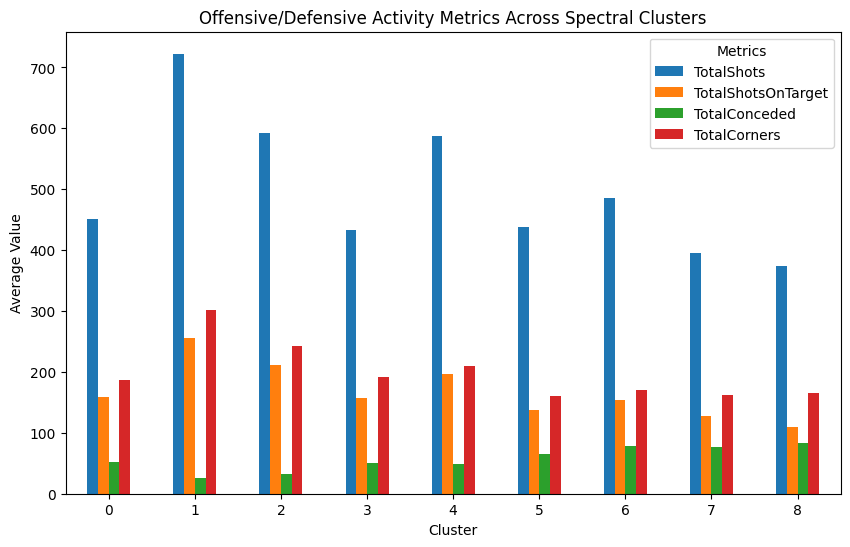

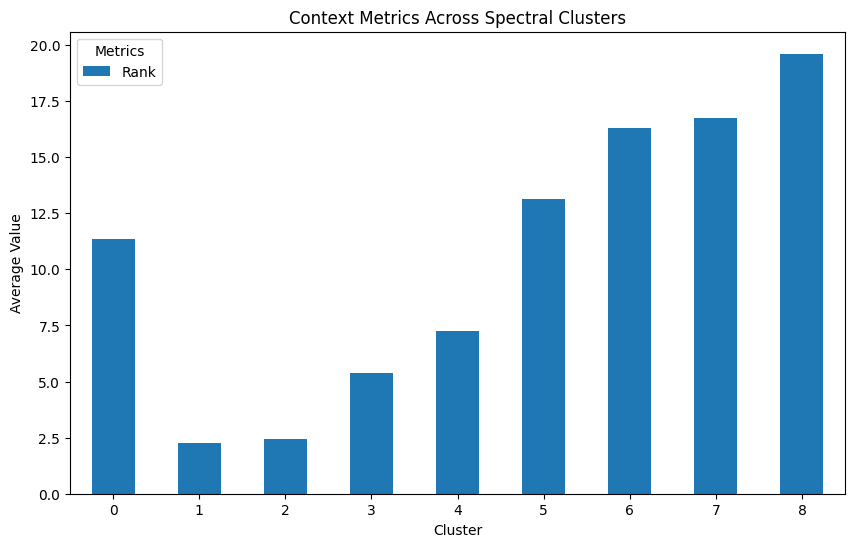

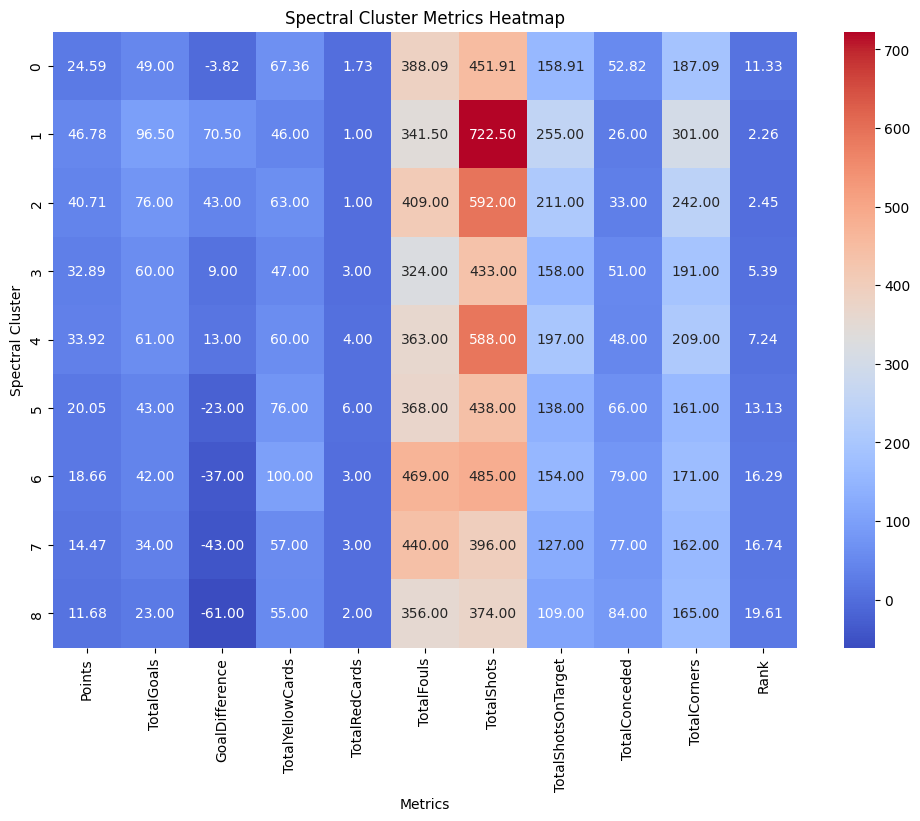

In [64]:
# Defining the metrics for each category
performance_metrics = ['Points', 'TotalGoals', 'GoalDifference']
discipline_metrics = ['TotalYellowCards', 'TotalRedCards', 'TotalFouls']
offensive_defensive_metrics = ['TotalShots', 'TotalShotsOnTarget', 'TotalConceded', 'TotalCorners']
context_metrics = ['Rank']

# Function to plot bar charts for each category
def plot_metrics_by_spcluster(category_name, metrics, data, spcluster_col='SpectralCluster'):
    spcluster_means = data.groupby(spcluster_col)[metrics].mean()
    spcluster_means.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{category_name} Metrics Across Spectral Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Average Value')
    plt.legend(title='Metrics')
    plt.xticks(rotation=0)
    plt.show()

# Performance Metrics
plot_metrics_by_spcluster('Performance', performance_metrics, final_data)

# Discipline Metrics
plot_metrics_by_spcluster('Discipline', discipline_metrics, final_data)

# Offensive/Defensive Metrics
plot_metrics_by_spcluster('Offensive/Defensive Activity', offensive_defensive_metrics, final_data)

# Context Metrics
plot_metrics_by_spcluster('Context', context_metrics, final_data)

# Heatmap for a comprehensive view
all_metrics = performance_metrics + discipline_metrics + offensive_defensive_metrics + context_metrics
spcluster_means = final_data.groupby('SpectralCluster')[all_metrics].mean()
plt.figure(figsize=(12, 8))
sns.heatmap(spcluster_means, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spectral Cluster Metrics Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Spectral Cluster')
plt.show()


## **2. Applying KMeans Clustering**

### **Determining the Optimal Number of KMeans Clusters (Silhouette Method)**

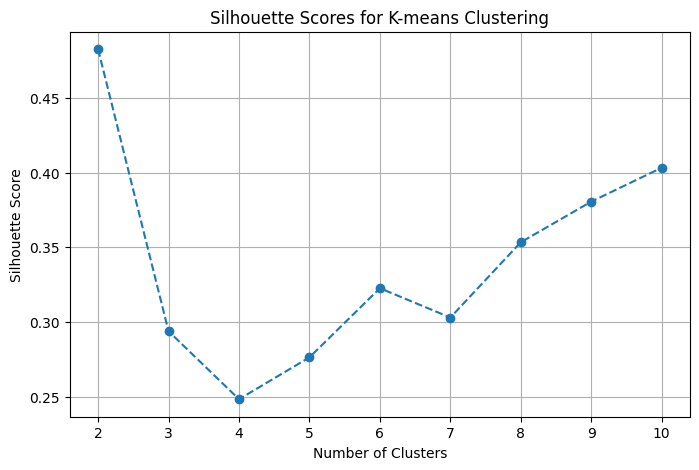

Optimal number of clusters for K-means Clustering: 2


In [65]:
# Start from k=2 to avoid trivial single-cluster results
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(clustering_data_scaled)
    score = silhouette_score(clustering_data_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for K-means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

# Optimal k based on the highest silhouette score
km_optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters for K-means Clustering: {km_optimal_k}")


In [66]:
# Setting the optimal number of clusters (based on elbow method)
km_optimal_k = 2

# Applying K-means clustering
kmeans = KMeans(n_clusters = km_optimal_k, random_state = 42)
final_data['KMeansCluster'] = kmeans.fit_predict(clustering_data_scaled)

# Inspectting K-means Clustering assignments
print(final_data[['Team', 'KMeansCluster']].head(10))


         Team  KMeansCluster
0  Man United              1
1     Chelsea              0
2   Liverpool              0
3    West Ham              1
4     Everton              1
5   Brentford              1
6     Watford              1
7    Brighton              1
8   Leicester              1
9   Tottenham              1




### *   **Evaluating K-means Clustering Quality**



In [67]:
# Calculate Silhouette Score for K-means Clustering
kmeans_silhouette = silhouette_score(clustering_data_scaled, final_data['KMeansCluster'])

# Printing the Silhouette Score for K-means Clustering
print(f"K-means Silhouette Score: {kmeans_silhouette:.3f}")


K-means Silhouette Score: 0.483


### *   **Using PCA for Visualization on the K-means Clusters**

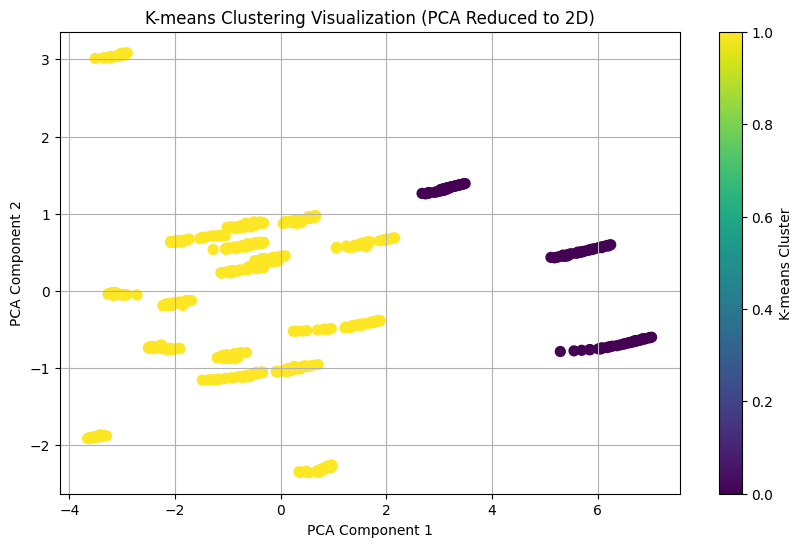

In [68]:
# Applying PCA to reduce data to 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(clustering_data_scaled)

# Adding PCA components to the dataframe for visualization
final_data['PCA1'] = pca_data[:, 0]
final_data['PCA2'] = pca_data[:, 1]

# Plotting K-means Clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    final_data['PCA1'],
    final_data['PCA2'],
    c=final_data['KMeansCluster'],
    cmap='viridis',
    s=50
)
plt.title("K-means Clustering Visualization (PCA Reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="K-means Cluster")
plt.grid()
plt.show()




### *   **Grouping by Team for the K-means clustering**



In [69]:
# Group by 'Team' and include the cluster assignments
team_kmcluster_summary = final_data.groupby('Team')[['KMeansCluster']].first()

# Merge with team stats for richer analysis
team_kmcluster_stats = final_data[['Team', 'Points', 'Rank', 'GoalDifference', 'KMeansCluster']]

# Sort by cluster for better visualization
team_kmcluster_stats = team_kmcluster_stats.sort_values(by='KMeansCluster')

# Inspect the output
print("Team Clustering Summary for K-means:")
team_kmcluster_stats


Team Clustering Summary for K-means:


,Team,Points,Rank,GoalDifference,KMeansCluster
62,Liverpool,10,3,68,0
600,Man City,74,1,73,0
84,Man City,10,5,73,0
462,Chelsea,50,3,43,0
81,Liverpool,13,2,68,0
...,...,...,...,...,...
276,Watford,13,17,-43,1
277,Burnley,10,18,-19,1
278,Norwich,10,19,-61,1
270,Crystal Palace,16,11,4,1




### *   **Visualizing Team K-means Clusters**



Number of Teams per K-means Cluster:
KMeansCluster
1    646
0    114
Name: count, dtype: int64


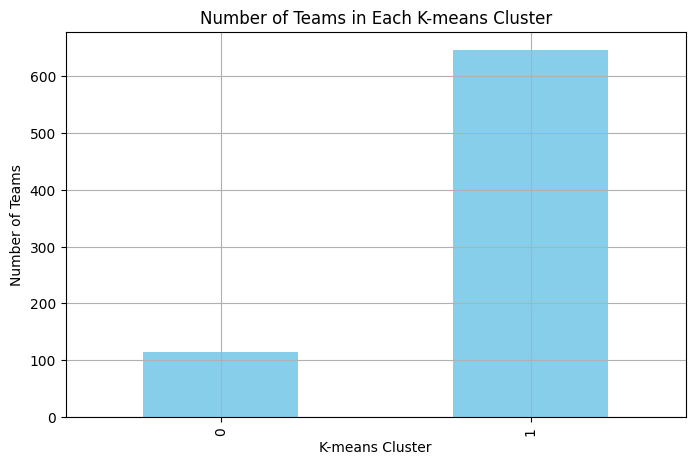

In [70]:
# Count teams in each K-means Cluster
team_count_by_kmcluster = team_kmcluster_stats['KMeansCluster'].value_counts()

# Display the count of teams per K-means Cluster
print("Number of Teams per K-means Cluster:")
print(team_count_by_kmcluster)

# Visualize cluster distribution
plt.figure(figsize=(8, 5))
team_count_by_kmcluster.sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Teams in Each K-means Cluster')
plt.xlabel('K-means Cluster')
plt.ylabel('Number of Teams')
plt.grid()
plt.show()


### *   **Summarizing Teams in Each K-means Cluster**

In [71]:
# Loop through each K-means Cluster and display unique teams along with their count
kmclusters = final_data['KMeansCluster'].unique()

print("Unique Teams in Each K-means Cluster:")
for kmcluster in sorted(kmclusters):
    # Get unique teams in the current K-means Cluster
    teams_in_kmcluster = final_data[final_data['KMeansCluster'] == kmcluster]['Team'].unique()
    # Print the K-means Cluster and the unique teams
    print(f"\nK-means Cluster {kmcluster} (Total Teams: {len(teams_in_kmcluster)}):")
    print(", ".join(teams_in_kmcluster))


Unique Teams in Each K-means Cluster:

K-means Cluster 0 (Total Teams: 3):
Chelsea, Liverpool, Man City

K-means Cluster 1 (Total Teams: 17):
Man United, West Ham, Everton, Brentford, Watford, Brighton, Leicester, Tottenham, Aston Villa, Burnley, Wolves, Newcastle, Southampton, Arsenal, Crystal Palace, Norwich, Leeds




### *   **Calculating K-means Cluster Averages**



In [72]:
# Drop non-numeric columns explicitly 'Team'
kmclustered_data = final_data.drop(columns=['Team'])

# Group data by KMeansCluster and calculate average for key features
kmeans_cluster_summary = kmclustered_data.groupby('KMeansCluster').mean()[[
    'Points', 'Rank', 'GoalDifference', 'TotalGoals', 'TotalConceded',
    'TotalFouls', 'TotalYellowCards', 'TotalRedCards',
    'TotalShots', 'TotalShotsOnTarget', 'TotalCorners'
]]

# Display the K-means Cluster summary
print("K-means Cluster Summary:")
kmeans_cluster_summary


K-means Cluster Summary:


,Points,Rank,GoalDifference,TotalGoals,TotalConceded,TotalFouls,TotalYellowCards,TotalRedCards,TotalShots,TotalShotsOnTarget,TotalCorners
KMeansCluster,,,,,,,,,,,
0,44.754386,2.324561,61.333333,89.666667,28.333333,364.000000,51.666667,1.000000,679.000000,240.333333,281.333333
1,23.654799,11.942724,-10.823529,47.176471,58.000000,387.588235,66.823529,2.352941,452.058824,154.764706,183.352941


### *   **Visualizing Key Metrics for K-means Clusters**

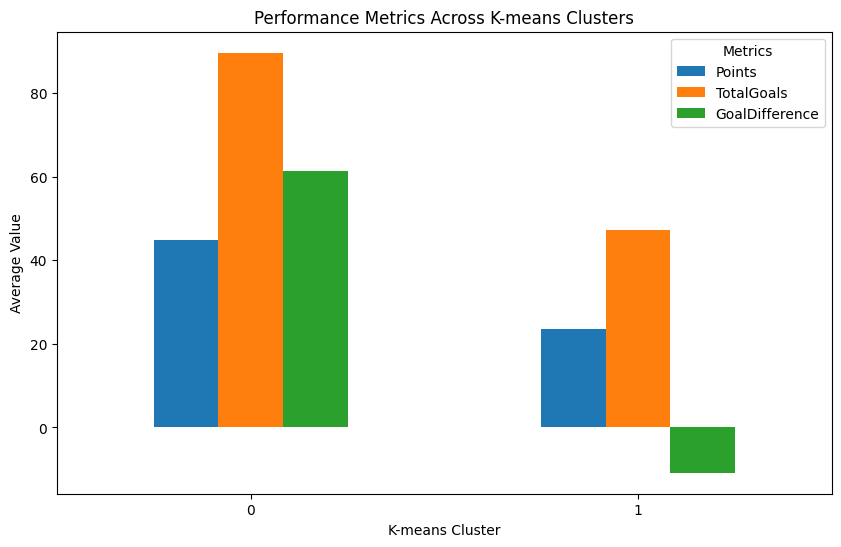

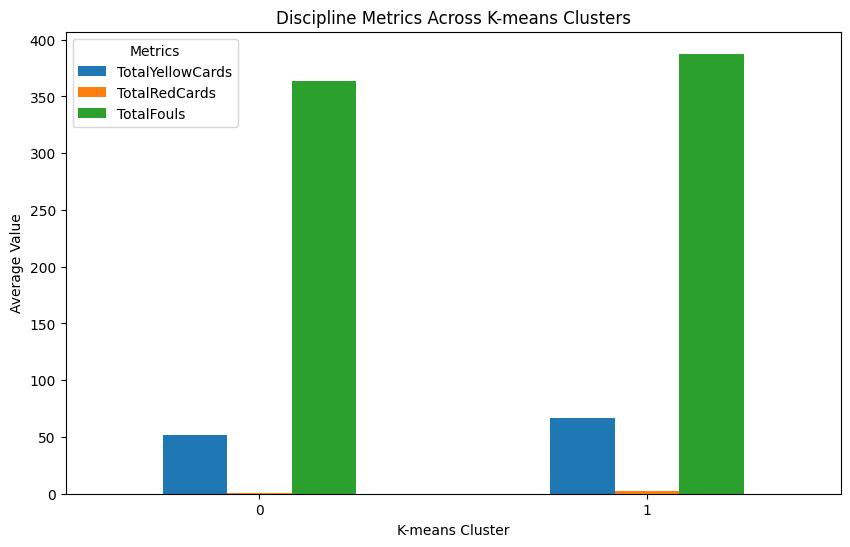

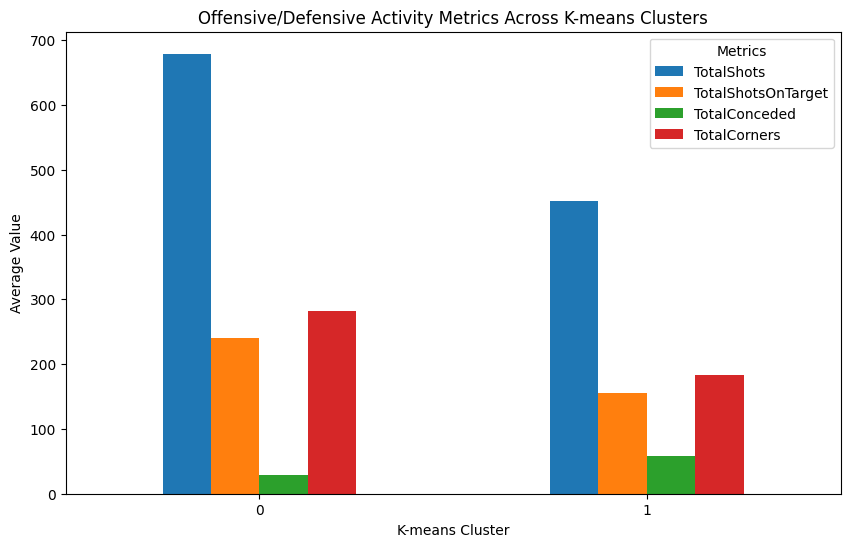

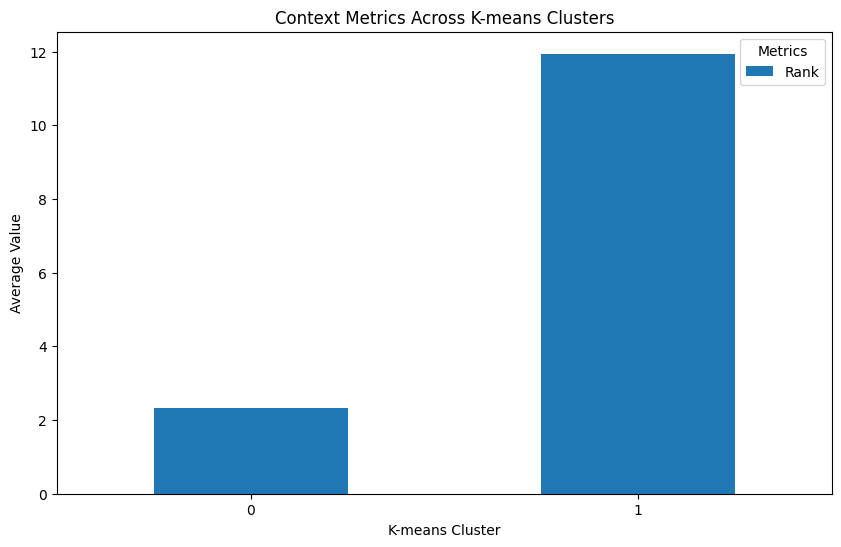

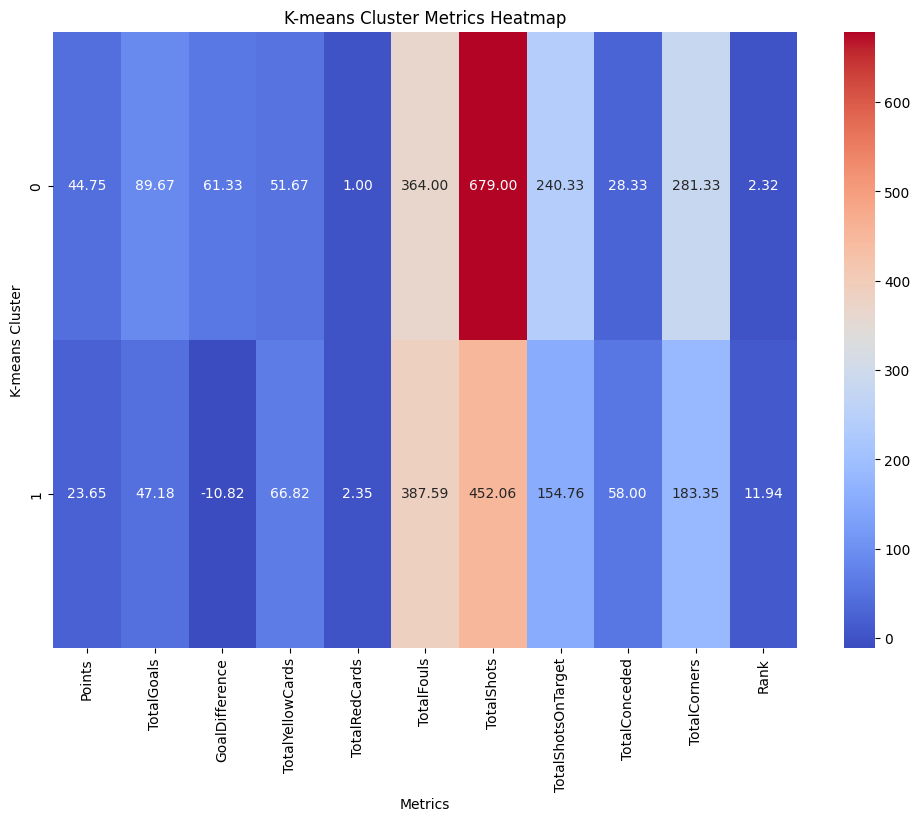

In [73]:
# Defining the metrics for each category
performance_metrics = ['Points', 'TotalGoals', 'GoalDifference']
discipline_metrics = ['TotalYellowCards', 'TotalRedCards', 'TotalFouls']
offensive_defensive_metrics = ['TotalShots', 'TotalShotsOnTarget', 'TotalConceded', 'TotalCorners']
context_metrics = ['Rank']

# Function to plot bar charts for each category
def plot_metrics_by_kmcluster(category_name, metrics, data, kmcluster_col='KMeansCluster'):
    kmcluster_means = data.groupby(kmcluster_col)[metrics].mean()
    kmcluster_means.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{category_name} Metrics Across K-means Clusters')
    plt.xlabel('K-means Cluster')
    plt.ylabel('Average Value')
    plt.legend(title='Metrics')
    plt.xticks(rotation=0)
    plt.show()

# Performance Metrics
plot_metrics_by_kmcluster('Performance', performance_metrics, final_data)

# Discipline Metrics
plot_metrics_by_kmcluster('Discipline', discipline_metrics, final_data)

# Offensive/Defensive Metrics
plot_metrics_by_kmcluster('Offensive/Defensive Activity', offensive_defensive_metrics, final_data)

# Context Metrics
plot_metrics_by_kmcluster('Context', context_metrics, final_data)

# Heatmap for a comprehensive view
all_metrics = performance_metrics + discipline_metrics + offensive_defensive_metrics + context_metrics
kmcluster_means = final_data.groupby('KMeansCluster')[all_metrics].mean()
plt.figure(figsize=(12, 8))
sns.heatmap(kmcluster_means, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('K-means Cluster Metrics Heatmap')
plt.xlabel('Metrics')
plt.ylabel('K-means Cluster')
plt.show()
